# CHIPS-CVN Energy Estimation Notebook

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import chipscvn.utils as utils
import chipscvn.config as config
import chipscvn.data as data
import chipscvn.models as models
import chipscvn.evaluators as evaluators
utils.gpu_setup()  # Setup the GPU's

/mnt/storage/jtingey/chips-cvn/env/miniconda/envs/chips-cvn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Welcome to JupyROOT 6.18/04
---  4 Physical GPUs, 4 Logical GPUs ---


Load the trained model from the configuration, run the energy estimation evaluator and print the columns in the Pandas DataFrame.

In [2]:
conf = config.get("config/eval_energy.yml")
evaluator = utils.get_evaluator(conf)
evaluator.run()

--- Running Evaluation ---

--- running inference...

--- Done (took 786.5434098243713 seconds) ---



2020-04-17 09:57:23.719214: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-04-17 09:57:24.020413: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


In [3]:
evaluator.events.loc[:, 'nuel_cc_qel_e'] = evaluator.events.nuel_cc_qel_e.map(lambda x: x[0])
evaluator.events.loc[:, 'nuel_cc_dis_e'] = evaluator.events.nuel_cc_dis_e.map(lambda x: x[0])
evaluator.events.loc[:, 'nuel_cc_res_e'] = evaluator.events.nuel_cc_res_e.map(lambda x: x[0])
evaluator.events.loc[:, 'nuel_nc_qel_e'] = evaluator.events.nuel_nc_qel_e.map(lambda x: x[0])
evaluator.events.loc[:, 'nuel_nc_dis_e'] = evaluator.events.nuel_nc_dis_e.map(lambda x: x[0])
evaluator.events.loc[:, 'nuel_nc_res_e'] = evaluator.events.nuel_nc_res_e.map(lambda x: x[0])
evaluator.events.loc[:, 'numu_cc_qel_e'] = evaluator.events.numu_cc_qel_e.map(lambda x: x[0])
evaluator.events.loc[:, 'numu_cc_dis_e'] = evaluator.events.numu_cc_dis_e.map(lambda x: x[0])
evaluator.events.loc[:, 'numu_cc_res_e'] = evaluator.events.numu_cc_res_e.map(lambda x: x[0])
evaluator.events.loc[:, 'numu_nc_qel_e'] = evaluator.events.numu_nc_qel_e.map(lambda x: x[0])
evaluator.events.loc[:, 'numu_nc_dis_e'] = evaluator.events.numu_nc_dis_e.map(lambda x: x[0])
evaluator.events.loc[:, 'numu_nc_res_e'] = evaluator.events.numu_nc_res_e.map(lambda x: x[0])

<Figure size 1152x720 with 0 Axes>

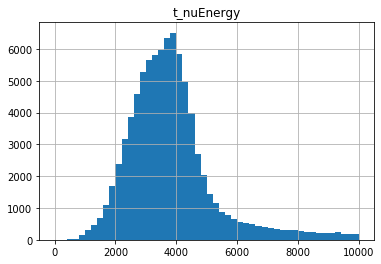

In [4]:
categories = [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]
events = evaluator.events[evaluator.events["t_cat"].isin(categories)]
plt.figure(figsize=(16,10))
events.hist(column='t_nuEnergy', bins=50, range=[0,10000])
plt.show()

In [8]:
import ROOT
nuel_cc_qel_h = ROOT.TH2D("nuel_cc_qel", "nuel_cc_qel", 40, 0, 10000, 40, 0, 10000)
nuel_cc_res_h = ROOT.TH2D("nuel_cc_res", "nuel_cc_res", 40, 0, 10000, 40, 0, 10000)
nuel_cc_dis_h = ROOT.TH2D("nuel_cc_dis", "nuel_cc_dis", 40, 0, 10000, 40, 0, 10000)
numu_cc_qel_h = ROOT.TH2D("numu_cc_qel", "numu_cc_qel", 40, 0, 10000, 40, 0, 10000)
numu_cc_res_h = ROOT.TH2D("numu_cc_res", "numu_cc_res", 40, 0, 10000, 40, 0, 10000)
numu_cc_dis_h = ROOT.TH2D("numu_cc_dis", "numu_cc_dis", 40, 0, 10000, 40, 0, 10000)
nuel_nc_qel_h = ROOT.TH2D("nuel_nc_qel", "nuel_nc_qel", 40, 0, 10000, 40, 0, 10000)
nuel_nc_res_h = ROOT.TH2D("nuel_nc_res", "nuel_nc_res", 40, 0, 10000, 40, 0, 10000)
nuel_nc_dis_h = ROOT.TH2D("nuel_nc_dis", "nuel_nc_dis", 40, 0, 10000, 40, 0, 10000)
numu_nc_qel_h = ROOT.TH2D("numu_nc_qel", "numu_nc_qel", 40, 0, 10000, 40, 0, 10000)
numu_nc_res_h = ROOT.TH2D("numu_nc_res", "numu_nc_res", 40, 0, 10000, 40, 0, 10000)
numu_nc_dis_h = ROOT.TH2D("numu_nc_dis", "numu_nc_dis", 40, 0, 10000, 40, 0, 10000)

nuel_cc_nqel_h = ROOT.TH2D("nuel_cc_nqel", "nuel_cc_nqel", 40, 0, 10000, 40, 0, 10000)
numu_cc_nqel_h = ROOT.TH2D("numu_cc_nqel", "numu_cc_nqel", 40, 0, 10000, 40, 0, 10000)
nuel_cc_h = ROOT.TH2D("nuel_cc", "nuel_cc", 40, 0, 10000, 40, 0, 10000)
numu_cc_h = ROOT.TH2D("numu_cc", "numu_cc", 40, 0, 10000, 40, 0, 10000)
nuel_nc_h = ROOT.TH2D("nuel_nc", "nuel_nc", 40, 0, 10000, 40, 0, 10000)
numu_nc_h = ROOT.TH2D("numu_nc", "numu_nc", 40, 0, 10000, 40, 0, 10000)
nc_h = ROOT.TH2D("nc", "nc", 40, 0, 10000, 40, 0, 10000)

frac_nuel = 0.114
frac_numu = 0.886
def fill_plots(row):
    cat = row["t_cat"]
    if cat == 0:
        nuel_cc_qel_h.Fill(row["t_nuEnergy"], row["nuel_cc_qel_e"])
        nuel_cc_h.Fill(row["t_nuEnergy"], row["nuel_cc_qel_e"])
    elif cat == 1:
        nuel_cc_res_h.Fill(row["t_nuEnergy"], row["nuel_cc_res_e"])
        nuel_cc_nqel_h.Fill(row["t_nuEnergy"], row["nuel_cc_res_e"])
        nuel_cc_h.Fill(row["t_nuEnergy"], row["nuel_cc_res_e"])
    elif cat == 2:
        nuel_cc_dis_h.Fill(row["t_nuEnergy"], row["nuel_cc_dis_e"])
        nuel_cc_nqel_h.Fill(row["t_nuEnergy"], row["nuel_cc_dis_e"])
        nuel_cc_h.Fill(row["t_nuEnergy"], row["nuel_cc_dis_e"])
    elif cat == 4:
        numu_cc_qel_h.Fill(row["t_nuEnergy"], row["numu_cc_qel_e"])
        numu_cc_h.Fill(row["t_nuEnergy"], row["numu_cc_qel_e"])
    elif cat == 5:
        numu_cc_res_h.Fill(row["t_nuEnergy"], row["numu_cc_res_e"])
        numu_cc_nqel_h.Fill(row["t_nuEnergy"], row["numu_cc_res_e"])
        numu_cc_h.Fill(row["t_nuEnergy"], row["numu_cc_res_e"])
    elif cat == 6:
        numu_cc_dis_h.Fill(row["t_nuEnergy"], row["numu_cc_dis_e"])
        numu_cc_nqel_h.Fill(row["t_nuEnergy"], row["numu_cc_dis_e"])
        numu_cc_h.Fill(row["t_nuEnergy"], row["numu_cc_dis_e"])
    elif cat == 8:
        nuel_nc_qel_h.Fill(row["t_nuEnergy"], row["nuel_nc_qel_e"])
        nuel_nc_h.Fill(row["t_nuEnergy"], row["nuel_nc_qel_e"])
        nc_h.Fill(row["t_nuEnergy"], row["nuel_nc_qel_e"], frac_nuel)
    elif cat == 9:
        nuel_nc_res_h.Fill(row["t_nuEnergy"], row["nuel_nc_res_e"])
        nuel_nc_h.Fill(row["t_nuEnergy"], row["nuel_nc_res_e"])
        nc_h.Fill(row["t_nuEnergy"], row["nuel_nc_res_e"], frac_nuel)
    elif cat == 10:
        nuel_nc_dis_h.Fill(row["t_nuEnergy"], row["nuel_nc_dis_e"])
        nuel_nc_h.Fill(row["t_nuEnergy"], row["nuel_nc_dis_e"])
        nc_h.Fill(row["t_nuEnergy"], row["nuel_nc_dis_e"], frac_nuel)
    elif cat == 12:
        numu_nc_qel_h.Fill(row["t_nuEnergy"], row["numu_nc_qel_e"])
        numu_nc_h.Fill(row["t_nuEnergy"], row["numu_nc_qel_e"])
        nc_h.Fill(row["t_nuEnergy"], row["numu_nc_qel_e"], frac_numu)
    elif cat == 13:
        numu_nc_res_h.Fill(row["t_nuEnergy"], row["numu_nc_res_e"])
        numu_nc_h.Fill(row["t_nuEnergy"], row["numu_nc_res_e"])
        nc_h.Fill(row["t_nuEnergy"], row["numu_nc_res_e"], frac_numu)
    elif cat == 14:
        numu_nc_dis_h.Fill(row["t_nuEnergy"], row["numu_nc_dis_e"])
        numu_nc_h.Fill(row["t_nuEnergy"], row["numu_nc_dis_e"])
        nc_h.Fill(row["t_nuEnergy"], row["numu_nc_dis_e"], frac_numu)

events.apply(fill_plots, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
89339    None
89340    None
89341    None
89342    None
89343    None
Length: 88245, dtype: object

In [9]:
hists = []
hists.append(nuel_cc_qel_h)
hists.append(nuel_cc_res_h)
hists.append(nuel_cc_dis_h)
hists.append(numu_cc_qel_h)
hists.append(numu_cc_res_h)
hists.append(numu_cc_dis_h)
hists.append(nuel_nc_qel_h)
hists.append(nuel_nc_res_h)
hists.append(nuel_nc_dis_h)
hists.append(numu_nc_qel_h)
hists.append(numu_nc_res_h)
hists.append(numu_nc_dis_h)
hists.append(nuel_cc_nqel_h)
hists.append(numu_cc_nqel_h)
hists.append(nuel_cc_h)
hists.append(numu_cc_h)
hists.append(nuel_nc_h)
hists.append(numu_nc_h)
hists.append(nc_h)

for hist in hists:
    for i in range(40):
        column_total = 0
        for j in range(40):
            column_total += hist.GetBinContent(i, j)
    
        for j in range(40):
            content = hist.GetBinContent(i, j)
            if content != 0:
                hist.SetBinContent(i, j, (content/column_total))     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


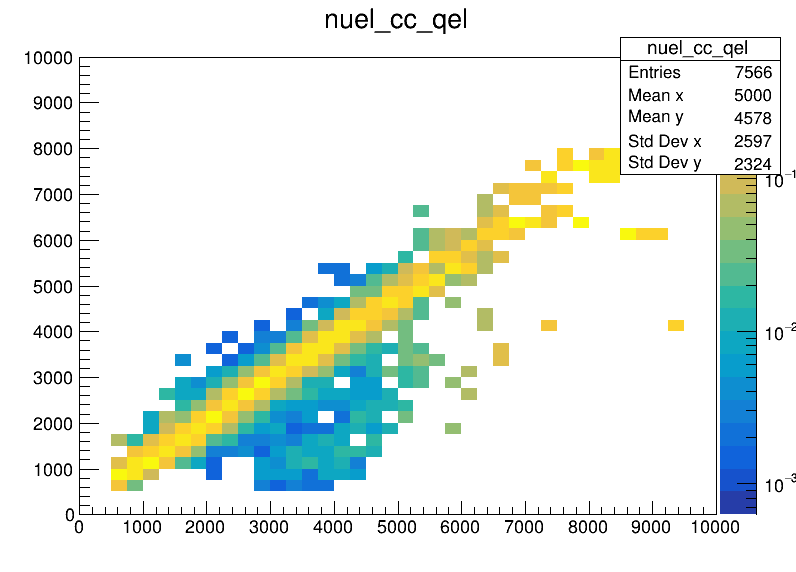

In [10]:
c = ROOT.TCanvas("test", 'test', 800, 600)
c.SetLogz()
hists[0].Draw("COLZ")
c.Draw()

In [17]:
for hist in hists:
    with open("smearing/" + hist.GetName() + ".dat",'w',encoding = 'utf-8') as f:
        f.write("energy(#" + hist.GetName() + ")<\n")
        f.write("@energy =\n")
        for i in range(40):
            f.write("{0, 40, ")
            for j in range(40):
                if j is 39:
                    f.write(str.format('{0:.5f}', hist.GetBinContent(j, i)))
                else:
                    f.write(str.format('{0:.5f}, ', hist.GetBinContent(j, i)))
            f.write("}:\n")
        f.write(">\n")

In [10]:
def true_reco_frac(row):
    return (row["true_nuEnergy"]-row["pred_nuEnergy"])/row["true_nuEnergy"]

evaluator.events['true_reco_frac_nuEnergy'] = evaluator.events.apply(true_reco_frac, axis=1)
selection['true_reco_frac_nuEnergy'] = selection.apply(true_reco_frac, axis=1)

<Figure size 1152x720 with 0 Axes>

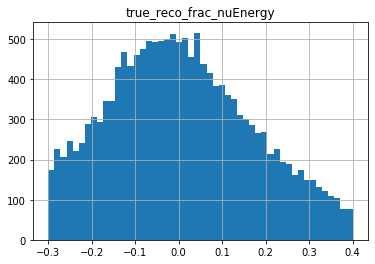

In [11]:
plt.figure(figsize=(16,10))
evaluator.events.hist(column='true_reco_frac_nuEnergy', bins=50, range=[-0.3,0.4])
plt.show()

<Figure size 1152x720 with 0 Axes>

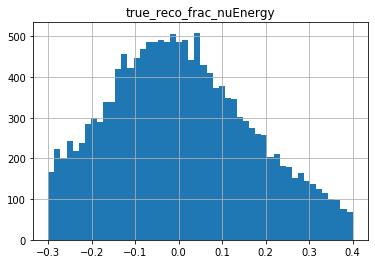

In [12]:
plt.figure(figsize=(16,10))
selection.hist(column='true_reco_frac_nuEnergy', bins=50, range=[-0.3,0.4])
plt.show()

In [13]:
from scipy.stats import norm
std_list = []
e_list = []
for energy in range(500,5000,500):
    upper = energy + 500
    subset = selection[(selection["true_nuEnergy"] >= energy)]
    subset = subset[(selection["true_nuEnergy"] <= upper)]
    mu, std = norm.fit(subset['true_reco_frac_nuEnergy'])
    std_list.append(std)
    e_list.append(energy+250)

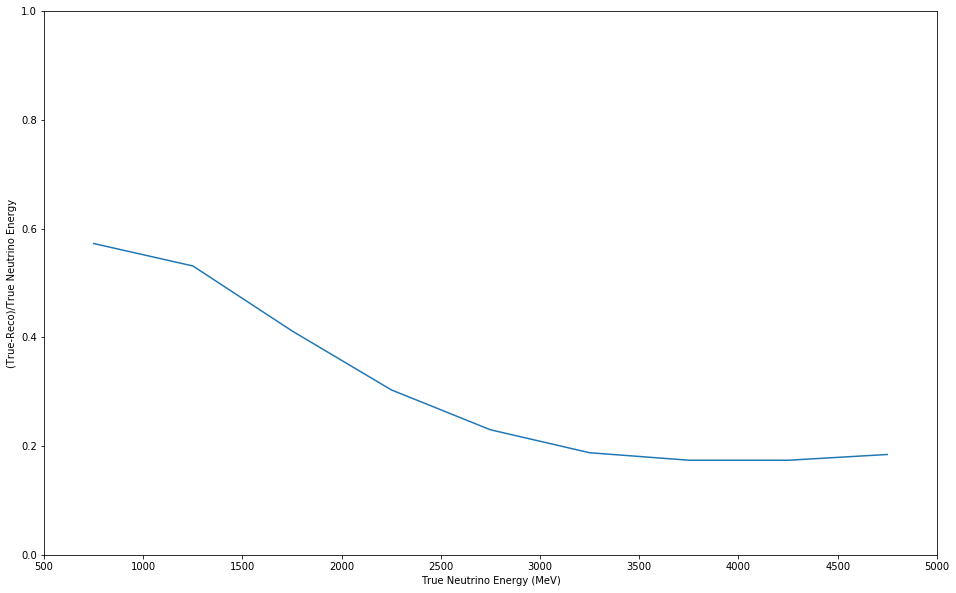

In [16]:
plt.figure(figsize=(16,10))
plt.plot(e_list, std_list)
plt.xlabel("True Neutrino Energy (MeV)")
plt.ylabel("(True-Reco)/True Neutrino Energy")
plt.xlim(500, 5000)
plt.ylim(0, 1)
plt.show()

In [15]:
print(e_list)
print(std_list)

[750, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 4750]
[0.5726357609312007, 0.5313419612334652, 0.4118199289891605, 0.3034171423668263, 0.2299670917820593, 0.18774670381826875, 0.1739888969833453, 0.1739273890513692, 0.18452421432251642]


energy(#nue_qe)<
@energy =
{0, 22, 0.5, 0.942308, 0.857143, 0.956522, 0.516667, 0.227907, 0.109718, 0.043956, 0.0741688, 0.0187668, 0.0257143, 0.00310559, 0.0237154, 0.0243902, 0.0106952, 0.0234375, 0.0227273, 0.0175439, 0, 0, 0.0357143, 0, 0}:
{0, 22, 0, 0.0192308, 0, 0.0434783, 0.45, 0.683721, 0.46395, 0.252747, 0.104859, 0.077748, 0.0285714, 0.0310559, 0.0158103, 0.00487805, 0.00534759, 0.0078125, 0.0340909, 0.0175439, 0, 0, 0, 0, 0}:
{0, 22, 0, 0.0192308, 0, 0, 0.0166667, 0.0883721, 0.410658, 0.596154, 0.450128, 0.235925, 0.131429, 0.0745342, 0.0316206, 0.0341463, 0.0213904, 0.0234375, 0.0227273, 0.0175439, 0.04, 0, 0, 0, 0}:
{0, 22, 0.166667, 0, 0, 0, 0, 0, 0.00940439, 0.104396, 0.358056, 0.565684, 0.42, 0.248447, 0.102767, 0.0926829, 0.0213904, 0.0390625, 0.0227273, 0.0175439, 0, 0, 0.0357143, 0, 0}:
{0, 22, 0.166667, 0.0192308, 0.142857, 0, 0.00833333, 0, 0.00626959, 0.00274725, 0.00767263, 0.0938338, 0.368571, 0.481366, 0.403162, 0.170732, 0.13369, 0.03125, 0, 0, 0.04, 0, 0, 0, 0}:
{0, 22, 0.166667, 0, 0, 0, 0.00833333, 0, 0, 0, 0.00255754, 0.00268097, 0.0228571, 0.158385, 0.395257, 0.502439, 0.406417, 0.101562, 0.102273, 0.0350877, 0, 0, 0, 0, 0}:
{0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00268097, 0, 0.00310559, 0.0237154, 0.160976, 0.342246, 0.53125, 0.352273, 0.192982, 0.08, 0, 0.0357143, 0, 0}:
{0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00268097, 0, 0, 0.00395257, 0.00487805, 0.0534759, 0.234375, 0.340909, 0.45614, 0.36, 0.214286, 0.0357143, 0, 0}:
{0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0.00255754, 0, 0.00285714, 0, 0, 0.00487805, 0.00534759, 0.0078125, 0.102273, 0.245614, 0.48, 0.785714, 0.857143, 0, 0};
>